In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from bokeh.io import output_notebook, show 
from bokeh.plotting import figure
from bokeh.models import HoverTool,ColumnDataSource 

In [2]:
dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

molecules=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']


In [3]:
molecules.index('HAl')

0

In [4]:
#insert deltaZ
for dfp in [dt_qzvpp,dt_tzvp,dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_aug,dt_ccpvtz]:
    dfp['deltaZ']=[molecules.index(x) for x in dfp.target]
    dfp['deltaZ']-=[molecules.index(x) for x in dfp.ref]
    dfp['deltaZ']=np.abs(dfp['deltaZ'])
dt_sto3g[::500]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ
0,0,1.3,sto3G,-195.799703,-198.025411,HAl,HeMg,2.225708,3.368281,-196.696725,0.897022,1
500,0,1.3,sto3G,-5.215354,-105.596187,HAl,NN,100.380833,12.312056,-61.824178,56.608824,6
1000,0,1.3,sto3G,-63.524548,-109.424064,HeMg,CO,45.899517,9.414647,-82.743289,19.218742,4
1500,0,1.3,sto3G,-109.911608,-120.538485,LiNa,BF,10.626877,6.789875,-113.782440,3.870832,2
2000,0,1.3,sto3G,-161.089708,-165.192451,BeNe,LiNa,4.102743,4.048074,-161.697052,0.607344,1
2500,0,1.3,sto3G,-169.840464,-198.025411,BF,HeMg,28.184947,7.969142,-180.896042,11.055578,3
3000,0,1.3,sto3G,-164.163661,-238.531958,CO,HAl,74.368296,11.211597,-195.119123,30.955462,5
3500,0,1.3,sto3G,-103.091530,-105.596187,CO,NN,2.504658,2.873520,-103.650876,0.559346,1
4000,0,1.3,sto3G,-108.673110,-120.538485,NN,BF,11.865375,5.476095,-110.598881,1.925770,2


In [5]:
#reduce to delta Z = 1,2
for dfp in [dt_qzvpp,dt_tzvp,dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_aug,dt_ccpvtz]:
    dfp=dfp.query("deltaZ<2.5")
    
dt_qzvpp=dt_qzvpp.query("deltaZ<2.5")
dt_tzvp=dt_tzvp.query("deltaZ<2.5")
dt_sto3g=dt_sto3g.query("deltaZ<2.5")
dt_sto6g=dt_sto6g.query("deltaZ<2.5")
dt_321g=dt_321g.query("deltaZ<2.5")
dt_631g=dt_631g.query("deltaZ<2.5")
dt_aug=dt_aug.query("deltaZ<2.5")
dt_ccpvtz=dt_ccpvtz.query("deltaZ<2.5")
dt_ccpvtz[::500]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ
0,0,1.3,cc-pVTZ,-198.269808,-200.900670,HAl,HeMg,2.630862,3.762205,-199.870264,1.600456,1
1200,0,1.3,cc-pVTZ,-230.169017,-241.604043,LiNa,HAl,11.435026,6.151346,-236.049268,5.880252,2
2000,0,1.3,cc-pVTZ,-164.649994,-167.312407,BeNe,LiNa,2.662413,3.412572,-167.153130,2.503135,1
2800,0,1.3,cc-pVTZ,-108.688988,-111.680284,BF,CO,2.991297,2.573720,-111.333724,2.644736,1
4000,0,1.3,cc-pVTZ,-111.020513,-122.868873,NN,BF,11.848360,4.986413,-121.267661,10.247148,2


In [6]:
#find the negative BSE (are due to change in the core electrons )
dfs_names=["dt_qzvpp","dt_tzvp","dt_sto3g","dt_sto6g","dt_321g","dt_631g","dt_aug","dt_ccpvtz"]
dfs_list=[dt_qzvpp,dt_tzvp,dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_aug,dt_ccpvtz]
for x in range(7):
    dfp=dfs_list[x]
    print(dfs_names[x])
    for ref in molecules:
        for target in molecules:
            dfp4=dfp.query("alchemy==4 & ref==@ref & target==@target ")
            if (dfp4.e_at_ref_bs-dfp4.e_ccsd).median()<0:
                print (ref,target, (dfp4.e_at_ref_bs-dfp4.e_ccsd).median(),(dfp4.e_alch-dfp4.e_ccsd).median())

dt_qzvpp
BeNe HeMg -0.017347837850508085 -0.05476628310037768
BeNe LiNa -0.21604671333849979 -0.24919809554977235
BF LiNa -0.12290574625099282 -0.1899202845725796
dt_tzvp
BeNe LiNa -0.1127965847349941 -0.13165871507756322
dt_sto3g
dt_sto6g
dt_321g
dt_631g
dt_aug
BeNe HeMg -0.1134963264335056 -0.11246662365913096
BeNe LiNa -0.23443615452548272 -0.27262386272217043
BF LiNa -0.14084310524398802 -0.19141533116074072


In [7]:
# find the non converged points
dfp=dt_aug.copy()
q=[]
for ref in molecules:
    for target in molecules:
        dfp4=dfp.query("alchemy==4 & delta_rho<7 & ref==@ref & target==@target ")
        if np.isnan((dfp4.e_alch-dfp4.e_at_ref_bs).median()):continue  # delta_rho >7
        if ((dfp4.e_alch-dfp4.e_at_ref_bs).median())<.1:continue     # accurate prediction
        q.append([ref,target,(dfp4.e_alch-dfp4.e_at_ref_bs).median(),(dfp4.e_at_ref_bs-dfp4.e_ccsd).median()])
q

[['HAl', 'LiNa', 0.2546876960874158, 3.9691029782345026],
 ['HeMg', 'BeNe', 0.9959166804261201, 4.1921136679799815],
 ['LiNa', 'HAl', 0.1695430775550193, 4.530245506623501],
 ['LiNa', 'BF', 0.13385588394240244, 4.277488074631506]]

In [28]:
def plotsc(dfp,ax,title,xlims,ylims,legend=False):
    for ref in molecules:
        for target in molecules:
            if target==ref: continue
            dfp0=dfp.query("alchemy==0 &  ref==@ref & target==@target ")
            dfp1=dfp.query("alchemy==1 &  ref==@ref & target==@target ")
            dfp2=dfp.query("alchemy==2 &  ref==@ref & target==@target ")
            dfp3=dfp.query("alchemy==3 &  ref==@ref & target==@target ")
            dfp4=dfp.query("alchemy==4 &  ref==@ref & target==@target ")

            #plt.scatter((dfp0.e_at_ref_bs-dfp0.e_ccsd).median(),(dfp0.e_alch-dfp0.e_ccsd).median(),color='C0 & distance<2.5',marker='o')
            pts1=ax.scatter((dfp1.e_at_ref_bs-dfp1.e_ccsd).median(),(dfp1.e_alch-dfp1.e_ccsd).median(),color='C1',marker='|')
            pts2=ax.scatter((dfp2.e_at_ref_bs-dfp2.e_ccsd).median(),(dfp2.e_alch-dfp2.e_ccsd).median(),color='C2',marker='x')
            pts3=ax.scatter((dfp3.e_at_ref_bs-dfp3.e_ccsd).median(),(dfp3.e_alch-dfp3.e_ccsd).median(),color='C3',marker='^')
            pts4=ax.scatter((dfp4.e_at_ref_bs-dfp4.e_ccsd).median(),(dfp4.e_alch-dfp4.e_ccsd).median(),color='C4',marker='s')
    
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)
    
    ax.tick_params(labelsize=20) 
    if legend:
        ax.legend((pts1,pts2,pts3,pts4),('APDFT1','APDFT2','APDFT3','APDFT4'),\
                  fontsize=15,handletextpad=0.1,loc=[0.01,0.557],markerscale=2.)
    
    ax.plot(xlims,ylims) # diagonal line
    
    ax.set_title(title,fontsize=25,pad=12)
    

C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecat

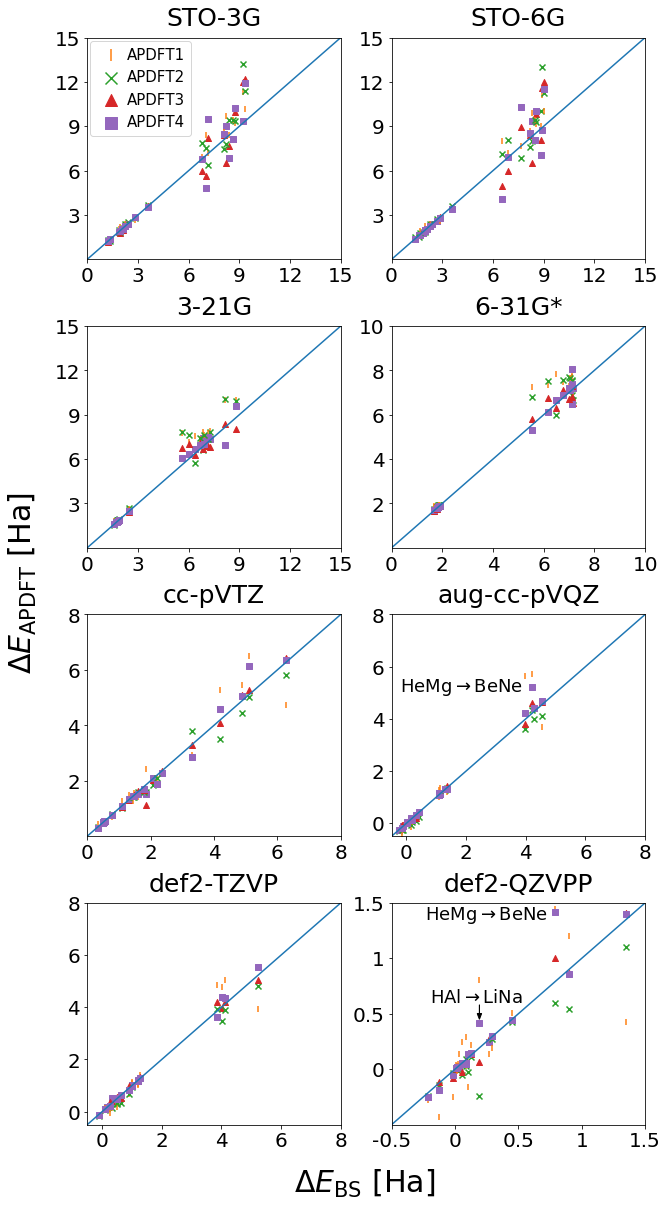

In [30]:
fig=plt.figure(figsize=(10,20))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r'$\Delta E_{\mathrm{APDFT}}$ [Ha] ' ,fontsize=30,labelpad=25)
plt.axes().set_xlabel(r'$\Delta E_{\mathrm{BS}}$ [Ha] ',fontsize=30,labelpad=25)
plt.axes().set_frame_on(False)
gkw={"hspace":.3}
axs=fig.subplots(4,2,gridspec_kw=gkw)
plotsc(dt_sto3g,axs[0][0],"STO-3G",[0,15],[0,15],legend=True)
plotsc(dt_sto6g,axs[0][1],"STO-6G",[0,15],[0,15])
plotsc(dt_321g,axs[1][0],"3-21G",[0,15],[0,15])
plotsc(dt_631g,axs[1][1],"6-31G*",[0,10],[0,10])
plotsc(dt_ccpvtz,axs[2][0],"cc-pVTZ",[0,8],[0,8])
plotsc(dt_aug,axs[2][1],"aug-cc-pVQZ",[-.5,8],[-.5,8])
plotsc(dt_tzvp,axs[3][0],"def2-TZVP",[-.5,8],[-.5,8])
plotsc(dt_qzvpp,axs[3][1],"def2-QZVPP",[-.5,1.5],[-.5,1.5])
#
# setting ticks 
axs[0][0].set_yticks([3,6,9,12,15])
axs[0][0].set_xticks([0,3,6,9,12,15])
axs[0][1].set_yticks([3,6,9,12,15])
axs[0][1].set_xticks([0,3,6,9,12,15])

axs[1][0].set_yticks([3,6,9,12,15])
axs[1][0].set_xticks([0,3,6,9,12,15])
axs[1][1].set_yticks([2,4,6,8,10])
axs[1][1].set_xticks([0,2,4,6,8,10])

axs[2][0].set_xticks([0,2,4,6,8])
axs[2][0].set_xticklabels(["0","2","4","6","8"])
axs[2][0].set_yticks([2,4,6,8])

axs[2][1].set_xticks([0,2,4,6,8])
axs[2][1].set_yticks([0,2,4,6,8])
axs[2][1].set_xticklabels(["0","2","4","6","8"])
axs[2][1].set_yticklabels(["0","2","4","6","8"])

axs[3][0].set_xticks([0,2,4,6,8])
axs[3][0].set_yticks([0,2,4,6,8])
axs[3][0].set_xticklabels(["0","2","4","6","8"])
axs[3][0].set_yticklabels(["0","2","4","6","8"])

axs[3][1].set_yticks([0,.5,1,1.5])
axs[3][1].set_yticklabels(["0","0.5","1","1.5"])
axs[3][1].set_xticks([-.5,0,.5,1,1.5])
axs[3][1].set_xticklabels(["-0.5","0","0.5","1","1.5"])

# some remarkable point
axs[3][1].text(-.24,1.35,r"HeMg$ \rightarrow $BeNe" ,fontsize=18)
#axs[3][1].arrow( .53, 1.42,.21 ,0.  ,length_includes_head=True,head_width=.035,color='black')
axs[3][1].text(-.2,.6,r"HAl$ \rightarrow $LiNa",fontsize=18)
axs[3][1].arrow(.193, .58,0.,-.13 ,length_includes_head=True,head_width=.035,color='black')

axs[2][1].text(-.2,5.06,r"HeMg$ \rightarrow $BeNe",fontsize=18)
#axs[2][1].arrow(3,5.2,1 ,0.  ,length_includes_head=True,head_width=.16,color='black')

#plt.savefig("Scatterplot_alchemy_vs_BasisSet.pdf", bbox_inches='tight')

In [10]:
"""
remakabily error for def2-QZVPP:  # e_alch-e_at_ref_bs // err for ref bs

[['HAl', 'LiNa', 0.2241467843737439, 0.19195201984700816],
 ['HeMg','BeNe' 0.6320680405137438, 0.792689445766996]]

for aug-ccpVQZ
['HeMg', 'BeNe', 0.9959166804261201, 4.1921136679799815]

 """

"\nremakabily error for def2-QZVPP:  # e_alch-e_at_ref_bs // err for ref bs\n\n[['HAl', 'LiNa', 0.2241467843737439, 0.19195201984700816],\n ['HeMg','BeNe' 0.6320680405137438, 0.792689445766996]]\n\nfor aug-ccpVQZ\n['HeMg', 'BeNe', 0.9959166804261201, 4.1921136679799815]\n\n "

In [11]:
"""p = figure(title="Def2-QZVPP",plot_width=1800, plot_height=1000)
alcolor={0:'brown',1:'yellow',2:'green',3:'red',4:'purple'}
def alcol(ao):
    return alcolor[ao]"""

'p = figure(title="Def2-QZVPP",plot_width=1800, plot_height=1000)\nalcolor={0:\'brown\',1:\'yellow\',2:\'green\',3:\'red\',4:\'purple\'}\ndef alcol(ao):\n    return alcolor[ao]'

In [12]:
"""q=[]
dfp=dt_aug.copy()
for ref in molecules:
    for target in molecules:
        dfp1=dfp.query("alchemy==1 &  ref==@ref & target==@target ")
        dfp2=dfp.query("alchemy==2 &  ref==@ref & target==@target ")
        dfp3=dfp.query("alchemy==3 &  ref==@ref & target==@target ")
        dfp4=dfp.query("alchemy==4 &  ref==@ref & target==@target ")
        if not np.isnan((dfp1.e_at_ref_bs-dfp1.e_ccsd).median() ) :
            #q.append({"ref":ref,"target":target,"alchemy":1,"bse":(dfp1.e_at_ref_bs-dfp1.e_ccsd).median(),"ae":(dfp1.e_alch-dfp1.e_ccsd).median()})
           # q.append({"ref":ref,"target":target,"alchemy":2,"bse":(dfp2.e_at_ref_bs-dfp2.e_ccsd).median(),"ae":(dfp2.e_alch-dfp2.e_ccsd).median()})
           # q.append({"ref":ref,"target":target,"alchemy":3,"bse":(dfp3.e_at_ref_bs-dfp3.e_ccsd).median(),"ae":(dfp3.e_alch-dfp3.e_ccsd).median()})
            q.append({"ref":ref,"target":target,"alchemy":4,"bse":(dfp4.e_at_ref_bs-dfp4.e_ccsd).median(),"ae":(dfp4.e_alch-dfp4.e_ccsd).median()})
            """

'q=[]\ndfp=dt_aug.copy()\nfor ref in molecules:\n    for target in molecules:\n        dfp1=dfp.query("alchemy==1 &  ref==@ref & target==@target ")\n        dfp2=dfp.query("alchemy==2 &  ref==@ref & target==@target ")\n        dfp3=dfp.query("alchemy==3 &  ref==@ref & target==@target ")\n        dfp4=dfp.query("alchemy==4 &  ref==@ref & target==@target ")\n        if not np.isnan((dfp1.e_at_ref_bs-dfp1.e_ccsd).median() ) :\n            #q.append({"ref":ref,"target":target,"alchemy":1,"bse":(dfp1.e_at_ref_bs-dfp1.e_ccsd).median(),"ae":(dfp1.e_alch-dfp1.e_ccsd).median()})\n           # q.append({"ref":ref,"target":target,"alchemy":2,"bse":(dfp2.e_at_ref_bs-dfp2.e_ccsd).median(),"ae":(dfp2.e_alch-dfp2.e_ccsd).median()})\n           # q.append({"ref":ref,"target":target,"alchemy":3,"bse":(dfp3.e_at_ref_bs-dfp3.e_ccsd).median(),"ae":(dfp3.e_alch-dfp3.e_ccsd).median()})\n            q.append({"ref":ref,"target":target,"alchemy":4,"bse":(dfp4.e_at_ref_bs-dfp4.e_ccsd).median(),"ae":(dfp4.e_alc

In [13]:
"""dfp=pd.DataFrame(q)
p = figure(title="aug-ccpvqz",plot_width=1800, plot_height=1000)
Alcol=[alcol(x) for x in list(dfp.alchemy)]
dfp['alcol']=Alcol
drdV=[]
source = ColumnDataSource(dfp)
p.cross('bse', 'ae', source=source,color='alcol', line_width=2)
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),\
                  ('Alchemy','@alchemy'),('Alchemy error','@ae')]#,('Total error','@tot_err')]
hover.mode = 'mouse'
p.add_tools(hover)
p.line([-.5,2],[-.5,2])
p.xaxis.axis_label = 'basis set error'
p.yaxis.axis_label = 'Alchemy error'
show(p)"""

'dfp=pd.DataFrame(q)\np = figure(title="aug-ccpvqz",plot_width=1800, plot_height=1000)\nAlcol=[alcol(x) for x in list(dfp.alchemy)]\ndfp[\'alcol\']=Alcol\ndrdV=[]\nsource = ColumnDataSource(dfp)\np.cross(\'bse\', \'ae\', source=source,color=\'alcol\', line_width=2)\nhover = HoverTool()\nhover.tooltips = [("Reference","@ref"), ("Target", "@target"),                  (\'Alchemy\',\'@alchemy\'),(\'Alchemy error\',\'@ae\')]#,(\'Total error\',\'@tot_err\')]\nhover.mode = \'mouse\'\np.add_tools(hover)\np.line([-.5,2],[-.5,2])\np.xaxis.axis_label = \'basis set error\'\np.yaxis.axis_label = \'Alchemy error\'\nshow(p)'

In [14]:
"""p = figure(title="Def2-QZVPP",plot_width=1800, plot_height=1000)
Alcol=[alcol(x) for x in list(dfp.alchemy)]
dfp['alcol']=Alcol
drdV=[]
source = ColumnDataSource(dfp)
p.cross('delta_rho', 'err_alch', source=source,color='alcol')
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",'@distance'),\
                  ('Alchemy','@alchemy'),('Alchemy error','@err_alch'),('delta_Rho','@delta_rho')]#,('Total error','@tot_err')]
hover.mode = 'mouse'
p.add_tools(hover)
p.xaxis.axis_label = 'delta_Rho'
p.yaxis.axis_label = 'Alchemy error'
show(p)"""

'p = figure(title="Def2-QZVPP",plot_width=1800, plot_height=1000)\nAlcol=[alcol(x) for x in list(dfp.alchemy)]\ndfp[\'alcol\']=Alcol\ndrdV=[]\nsource = ColumnDataSource(dfp)\np.cross(\'delta_rho\', \'err_alch\', source=source,color=\'alcol\')\nhover = HoverTool()\nhover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",\'@distance\'),                  (\'Alchemy\',\'@alchemy\'),(\'Alchemy error\',\'@err_alch\'),(\'delta_Rho\',\'@delta_rho\')]#,(\'Total error\',\'@tot_err\')]\nhover.mode = \'mouse\'\np.add_tools(hover)\np.xaxis.axis_label = \'delta_Rho\'\np.yaxis.axis_label = \'Alchemy error\'\nshow(p)'